In [1]:
  
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import tableone

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from lifelines import *
from lifelines.utils import concordance_index

# Load data

In [2]:
# METABRIC
#input_file = "./brca_metabric/data_clinical_patient.txt"
#data_frame = pd.read_csv(input_file, sep='\t')
input_file = "./brca_metabric_clinical_data.tsv"
data_frame = pd.read_csv(input_file, sep='\t', header=0)

# MSK  breast cancer
file = "./breast_msk_2018_clinical_data.tsv"
testdata = pd.read_csv(file, sep='\t', header=0)

# Summary

In [3]:
data_frame.keys().values

array(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype',
       'Cohort', 'ER status measured by IHC', 'ER Status',
       'Neoplasm Histologic Grade', 'HER2 status measured by SNP6',
       'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'PR Status', 'Radio Therapy', 'Number of Samples Per Patient',
       'Sample Type', '3-Gene classifier subtype', 'Tumor Size',
       'Tumor Stage', "Patient's Vital Status"], dtype=object)

In [4]:
testdata.keys().values

array(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'Disease Free Event',
       'Disease Free (Months)', 'ER PCT Primary',
       'ER Status of Sequenced Sample', 'ER Status of the Primary',
       'Fraction Genome Altered', 'HER2 FISH Status of Sequenced Sample',
       'HER2 FISH Ratio Value of Sequenced Sample',
       'HER2 FISH Ratio Primary',
       'HER2 FISH Status (Report and ASCO) of Primary',
       'HER2 IHC Status Primary', 'HER2 IHC Score of Sequenced Sample',
       'HER2 IHC Status of Sequenced Sample', 'HER2 IHC Score Primary',
       'HER2 Primary Status', 'Overall HR Status of Sequenced Sample',
       'Invasive Carcinoma Diagnosis Age',
       'Time to Diagnosis Invasive Carcinoma',
       'Last Communication Contact', 'Primary Tumor Laterality',
       'Menopausal Status At Diagnosis',
       'Metastatic Disease at Last Follow-up',
       'Metastatic Recurrence Time', 'Mutation Count', 'M Stage',
       'NGS Sample Collectio

In [5]:
data_frame.shape # dim
data_frame.head(10)

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,Sample Type,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:LIVING,Negative,YES,1,Primary,ER-/HER2-,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:LIVING,Positive,YES,1,Primary,ER+/HER2- High Prolif,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,163.700000,1:DECEASED,Positive,NO,1,Primary,NaN,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:LIVING,Positive,YES,1,Primary,NaN,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,41.366667,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,brca_metabric,MB-0010,MB-0010,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,LumB,...,7.800000,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
6,brca_metabric,MB-0014,MB-0014,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,YES,LumB,...,164.333333,0:LIVING,Positive,YES,1,Primary,NaN,10.0,2.0,Living
7,brca_metabric,MB-0020,MB-0020,70.00,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,YES,Normal,...,22.400000,1:DECEASED,Negative,YES,1,Primary,ER-/HER2-,65.0,3.0,Died of Disease
8,brca_metabric,MB-0022,MB-0022,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,NO,claudin-low,...,99.533333,1:DECEASED,Negative,YES,1,Primary,NaN,29.0,2.0,Died of Other Causes
9,brca_metabric,MB-0025,MB-0025,76.24,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,Primary,NaN,34.0,2.0,NaN


In [6]:
testdata.head(5)

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Disease Free Event,Disease Free (Months),ER PCT Primary,ER Status of Sequenced Sample,ER Status of the Primary,...,Number of Samples Per Patient,Site of Sample,Sample Type,Sex,Stage At Diagnosis,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Patient's Vital Status
0,breast_msk_2018,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.1,70,Positive,Positive,...,1,Treatment Naive Primary,Primary,Female,IV,NaN,Breast Invasive Ductal Carcinoma,Breast,T1c,Alive
1,breast_msk_2018,P-0000012,P-0000012-T02-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,0,218.0,0,Negative,Negative,...,1,Treatment Naive Primary,Primary,Female,IIA,NaN,Breast Invasive Ductal Carcinoma,Breast,T2,Alive
2,breast_msk_2018,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,68.9,90,Positive,Positive,...,1,Liver,Metastasis,Female,IB,548.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
3,breast_msk_2018,P-0000041,P-0000041-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,90.2,50,Positive,Positive,...,1,Breast,Metastasis,Female,IA,637.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
4,breast_msk_2018,P-0000057,P-0000057-T01-IM3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,0.5,80,Positive,Positive,...,1,Post-Treatment Primary,Primary,Female,IV,522.0,Breast Mixed Ductal and Lobular Carcinoma,Breast,TX,Deceased


In [7]:
#data_frame.iloc[1] # type of data

# Clean data (METABRIC)

In [8]:
#data = data_frame.iloc[3:-1,:] #
data = data_frame

data = data[data["Patient's Vital Status"].isin(['Living', 'Died of Disease'])]  # Exclude patients who die for other reasons

del data["Patient's Vital Status"] #delete  column:Patient's Vital Status
#del data["#Patient Identifier"]

#string to number
data[['Lymph nodes examined positive','Overall Survival (Months)' , 'Nottingham prognostic index']] = \
data[['Lymph nodes examined positive','Overall Survival (Months)' , 'Nottingham prognostic index']].astype(float)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
data = data.dropna()
print(data.shape)
data.head(10)

(854, 34)


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,Sample Type,3-Gene classifier subtype,Tumor Size,Tumor Stage
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,IDC,84.633333,0:LIVING,Positive,YES,1,Primary,ER+/HER2- High Prolif,10.0,1.0
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,MDLC,41.366667,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- High Prolif,40.0,2.0
5,brca_metabric,MB-0010,MB-0010,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,LumB,...,IDC,7.800000,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- High Prolif,31.0,4.0
11,brca_metabric,MB-0035,MB-0035,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,NO,Her2,...,ILC,36.266667,1:DECEASED,Negative,NO,1,Primary,ER+/HER2- High Prolif,28.0,2.0
12,brca_metabric,MB-0036,MB-0036,85.49,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,LumA,...,IDC,132.033333,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- Low Prolif,22.0,4.0
22,brca_metabric,MB-0060,MB-0060,45.43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,IDC,140.866667,0:LIVING,Positive,YES,1,Primary,ER+/HER2- High Prolif,23.0,2.0
25,brca_metabric,MB-0066,MB-0066,61.49,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumB,...,IDC,157.433333,0:LIVING,Positive,YES,1,Primary,ER+/HER2- High Prolif,16.0,2.0
35,brca_metabric,MB-0100,MB-0100,68.68,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,YES,Basal,...,IDC,8.066667,1:DECEASED,Negative,YES,1,Primary,ER-/HER2-,39.0,2.0
36,brca_metabric,MB-0101,MB-0101,46.89,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,Moderate,NO,Normal,...,ILC,148.033333,0:LIVING,Positive,YES,1,Primary,ER+/HER2- Low Prolif,34.0,2.0
37,brca_metabric,MB-0102,MB-0102,51.38,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,YES,LumB,...,ILC,140.766667,1:DECEASED,Positive,YES,1,Primary,ER+/HER2- High Prolif,40.0,2.0


Data transform

In [10]:
# view value
data["Cellularity"].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [11]:
# Cellularity 
size_mapping = {
           'High': 3,
           'Moderate': 2,
           'Low': 1}
data['Cellularity'] = data['Cellularity'].map(size_mapping)

#Chemotherapy
data['Chemotherapy'] = data['Chemotherapy'].map({'YES':2,"NO":1})

#ER status measured by IHC
data['ER status measured by IHC'] = data['ER status measured by IHC'].map({"Positve":2,'Negative':1})

# HER2 status measured by SNP6
data['HER2 status measured by SNP6'] = data['HER2 status measured by SNP6'].map({'NEUTRAL':1, 'LOSS':2, 'GAIN':3, 'UNDEF':4})

# Hormone Therapy
data['Hormone Therapy'] = data['Hormone Therapy'].map({"YES":2,'NO':1})

# Inferred Menopausal State
data['Inferred Menopausal State'] = data['Inferred Menopausal State'].map({"Post":2,'Pre':1})

# Inferred Menopausal State
data['Integrative Cluster'] = data['Integrative Cluster'].map(\
        {'9':9, '7':7, '3':3, '10':10, '8':8, '2':2, '5':5, '4ER-':4, '6':6, '4ER+':4, '1':1})
#data['Integrative Cluster'] = data['Integrative Cluster'].map({'4ER-'：'4', '4ER+':'4'})
#data['Integrative Cluster'] = data['Integrative Cluster'].astype(int)

# Age at Diagnosis
data['Age at Diagnosis'] = data['Age at Diagnosis'].astype(float)

#Overall Survival Status
data['Overall Survival Status'] = data['Overall Survival Status'].map({'0:LIVING':0,'1:DECEASED':1})

#'Pam50 + Claudin-low subtype'
data['Pam50 + Claudin-low subtype'] = data['Pam50 + Claudin-low subtype'].map(\
                    {'LumB':1, 'Her2':2, 'LumA':3, 'Basal':4, 'claudin-low':5, 'Normal':6, 'NC':7})

#'3-Gene classifier subtype'
data['3-Gene classifier subtype'] = data['3-Gene classifier subtype'].map(\
                                {'ER+/HER2- High Prolif':1, 'ER+/HER2- Low Prolif':2, 'ER-/HER2-':3, 'HER2+':4})

# 'Primary Tumor Laterality'
data['Primary Tumor Laterality'] = data['Primary Tumor Laterality'].map({'Right':1, 'Left':2})

#'Radio Therapy'
data['Radio Therapy'] = data['Radio Therapy'].map({'YES':2, 'NO':1})

#'Tumor Other Histologic Subtype'
data['Tumor Other Histologic Subtype'] = data['Tumor Other Histologic Subtype'].map(
    {'Mixed':1, 'Ductal/NST':2, 'Lobular':3, 'Mucinous':4, 'Medullary':5, 'Other':6,
       'Tubular/ cribriform':7})

#''Type of Breast Surgery''
data['Type of Breast Surgery'] = data['Type of Breast Surgery'].map({'MASTECTOMY':1, 'BREAST CONSERVING':2})

#'PR Status'
data['PR Status'] = data['PR Status'].map({'Negative':1, 'Positive':2})

#'ER Status'
data['ER Status'] = data['ER Status'].map({'Negative':1, 'Positive':2})

data = data[~data['Overall Survival (Months)'].isin([""])]

data = data[~data['Overall Survival Status'].isin([""])] # Delete patients with empty labels

# Select patients whose fifth year can determine their survival status

died = data[data["Overall Survival Status"]==1]
print(died.shape)
Living = data[data["Overall Survival Status"]==0]

#If the survival time is greater than 60 months, the survival status of the patient in 
#the fifth year can be determined as survival, and the survival status of the patient 
#less than 60 months cannot be determined, so these subjects need to be eliminated.
Living = Living[Living['Overall Survival (Months)']>=60] 
print(Living.shape)

died["Status"] = pd.cut(died['Overall Survival (Months)'],bins = [0,60,10000], labels = [1,0]) #Living: 0, Deceased:1 .
Living["Status"] = 0  



(370, 34)
(450, 34)


<ipython-input-11-973da42aa5ab>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["Status"] = pd.cut(died['Overall Survival (Months)'],bins = [0,60,10000], labels = [1,0]) #Living: 0, Deceased:1 .


In [12]:
data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,Sample Type,3-Gene classifier subtype,Tumor Size,Tumor Stage
1,brca_metabric,MB-0002,MB-0002,43.19,2,Breast Cancer,Breast Invasive Ductal Carcinoma,3,1,3,...,IDC,84.633333,0,2,2,1,Primary,1,10.0,1.0
4,brca_metabric,MB-0008,MB-0008,76.97,1,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,3,2,1,...,MDLC,41.366667,1,2,2,1,Primary,1,40.0,2.0
5,brca_metabric,MB-0010,MB-0010,78.77,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,1,...,IDC,7.800000,1,2,2,1,Primary,1,31.0,4.0
11,brca_metabric,MB-0035,MB-0035,84.22,1,Breast Cancer,Breast Invasive Lobular Carcinoma,3,1,2,...,ILC,36.266667,1,1,1,1,Primary,1,28.0,2.0
12,brca_metabric,MB-0036,MB-0036,85.49,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,3,...,IDC,132.033333,1,2,2,1,Primary,2,22.0,4.0


concat data 

In [13]:
df = pd.concat((died,Living))
print(died.shape)
print(Living.shape)
print(df.shape)

print("five-survival-rate:",sum(df["Status"]) / df.shape[0] )
print('number:',df.shape[0])
print('Deceased:',sum(df["Status"]))

(370, 35)
(450, 35)
(820, 35)
five-survival-rate: 0.23414634146341465
number: 820
Deceased: 192


In [14]:
df.head(5)

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,Sample Type,3-Gene classifier subtype,Tumor Size,Tumor Stage,Status
4,brca_metabric,MB-0008,MB-0008,76.97,1,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,3,2,1,...,41.366667,1,2,2,1,Primary,1,40.0,2.0,1
5,brca_metabric,MB-0010,MB-0010,78.77,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,1,...,7.800000,1,2,2,1,Primary,1,31.0,4.0,1
11,brca_metabric,MB-0035,MB-0035,84.22,1,Breast Cancer,Breast Invasive Lobular Carcinoma,3,1,2,...,36.266667,1,1,1,1,Primary,1,28.0,2.0,1
12,brca_metabric,MB-0036,MB-0036,85.49,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,3,...,132.033333,1,2,2,1,Primary,2,22.0,4.0,0
35,brca_metabric,MB-0100,MB-0100,68.68,1,Breast Cancer,Breast Invasive Ductal Carcinoma,1,2,4,...,8.066667,1,1,2,1,Primary,3,39.0,2.0,1


In [15]:
df.shape

(820, 35)

# Clean data (MSK breast cancer)

In [16]:
Commonkeys_MSK = ["Invasive Carcinoma Diagnosis Age","ER Status of the Primary","Tumor Sample Histology",
                   "Menopausal Status At Diagnosis","Primary Tumor Laterality","Mutation Count",
                   "Overall Survival (Months)","Overall Survival Status","PR Status of the Primary", "T Stage"]
Commonkeys_METABRIC = ["Age at Diagnosis","ER Status","Tumor Other Histologic Subtype","Inferred Menopausal State",
                       "Primary Tumor Laterality","Mutation Count","Overall Survival (Months)","Overall Survival Status",
                       "PR Status","Tumor Stage"]

Commonkeys_MSK = np.array(Commonkeys_MSK)
Commonkeys_METABRIC = np.array(Commonkeys_METABRIC)

keys = df.keys().values


In [17]:
comindex = [i for i in range(np.shape(Commonkeys_METABRIC)[0])  if Commonkeys_METABRIC[i] in keys]

In [18]:
MSK_keys = Commonkeys_MSK[comindex]
testMSK = testdata[MSK_keys]
testMSK.columns = Commonkeys_METABRIC[comindex]

In [19]:

print(testMSK.shape)
testMSK.head(5)

(1918, 10)


,Age at Diagnosis,ER Status,Tumor Other Histologic Subtype,Inferred Menopausal State,Primary Tumor Laterality,Mutation Count,Overall Survival (Months),Overall Survival Status,PR Status,Tumor Stage
0,37,Positive,Breast Invasive Ductal Carcinoma,Pre,Left,4.0,31.5,0:LIVING,Positive,T1c
1,43,Negative,Breast Invasive Ductal Carcinoma,Pre,Right,1.0,218.0,0:LIVING,Negative,T2
2,37,Positive,Breast Invasive Ductal Carcinoma,Pre,Right,7.0,98.0,1:DECEASED,Positive,T1b
3,43,Positive,Breast Invasive Ductal Carcinoma,Pre,Left,10.0,123.1,1:DECEASED,Positive,T1b
4,38,Positive,Breast Mixed Ductal and Lobular Carcinoma,Pre,Left,5.0,63.6,1:DECEASED,Positive,TX


In [20]:
# view value
#testMSK['ER Status'] = testMSK['ER Status'].map({'Negative':1, 'Positive':2})
testMSK["ER Status"].unique()
#print(testMSK)

array(['Positive', 'Negative', 'Unk/ND'], dtype=object)

In [21]:
#'PR Status'
testMSK = testMSK[~testMSK['PR Status'].isin(["Unk/ND"])]
testMSK['PR Status'] = testMSK['PR Status'].map({'Negative':1, 'Positive':2})
print(testMSK.shape)
#'ER Status'
testMSK = testMSK[~testMSK['ER Status'].isin(["Unk/ND"])]
testMSK['ER Status'] = testMSK['ER Status'].map({'Negative':1, 'Positive':2})

# Inferred Menopausal State
testMSK = testMSK[~testMSK['Inferred Menopausal State'].isin(['Peri', 'Male','unk'])]
testMSK["Inferred Menopausal State"] = testMSK["Inferred Menopausal State"].map({
    'Post':2, 'Pre':1})

#'Tumor Other Histologic Subtype'
testMSK["Tumor Other Histologic Subtype"] = testMSK["Tumor Other Histologic Subtype"].map(
    {'Breast Mixed Ductal and Lobular Carcinoma':1, 'Breast Invasive Ductal Carcinoma':2, 'Breast Invasive Lobular Carcinoma':3,
     'Breast Invasive Mixed Mucinous Carcinoma':4, 'Breast Invasive Carcinoma, NOS':2,'Breast Undifferentiated Carcinoma':6,
     'Breast Metaplastic Carcinoma':6,'Breast Invasive Myoepithelial Carcinoma':6,'Breast Invasive Carcinosarcoma':6,
     'Breast Adenoid Cystic Carcinoma':6,'Tubular Carcinoma':7})

# 'Primary Tumor Laterality'
testMSK = testMSK[~testMSK['Primary Tumor Laterality'].isin(['Unknown','Bilateral/Right', 'Bilateral/Left'])]
testMSK['Primary Tumor Laterality'] = testMSK['Primary Tumor Laterality'].map({'Right':1, 'Left':2})

# Tumor stage
testMSK["Tumor Stage"] = testMSK["Tumor Stage"].map({
    'T1c':1., 'T2':2, 'T1b':1., 'TX':4, 'T3':3, 'T1a':1, 'T4c':4, 'T4b':4, 'T4a':4, 'T4d':4,
       'unk':1, 'T0':1, 'T1mi':1, 'T4':4, 'T1':1, 'Tis':1, 'T1C':1 })

testMSK.to_csv("./msk.csv")
# Select patients whose fifth year can determine their survival status

print(testMSK.shape)

tsdied = testMSK[testMSK["Overall Survival Status"]=="0:LIVING"]
print(tsdied.shape)
tsLiving = testMSK[testMSK["Overall Survival Status"]=="1:DECEASED"]
print(tsLiving.shape)
#If the survival time is greater than 60 months, the survival status of the patient in 
#the fifth year can be determined as survival, and the survival status of the patient 
#less than 60 months cannot be determined, so these subjects need to be eliminated.
tsLiving = tsLiving[tsLiving['Overall Survival (Months)']>=60] 

tsdied["Status"] = pd.cut(tsdied['Overall Survival (Months)'],bins = [0,60,10000], labels = [1,0]) #Living: 0, Deceased:1 .
tsLiving["Status"] = 0 
testdf = pd.concat((tsdied,tsLiving))

testdf['Overall Survival Status'] = testdf['Overall Survival Status'].map({'0:LIVING':0,'1:DECEASED':1})

(1877, 10)
(1701, 10)
(1333, 10)
(368, 10)


<ipython-input-21-9c4e44ccf637>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsdied["Status"] = pd.cut(tsdied['Overall Survival (Months)'],bins = [0,60,10000], labels = [1,0]) #Living: 0, Deceased:1 .


In [22]:
print("five-survival-rate:",sum(testdf["Status"]) / testdf.shape[0] )
print('number:',testdf.shape[0])
print('Deceased:',sum(testdf["Status"]))
print(testdf.columns)

five-survival-rate: 0.5526315789473685
number: 1520
Deceased: 840
Index(['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'Overall Survival (Months)',
       'Overall Survival Status', 'PR Status', 'Tumor Stage', 'Status'],
      dtype='object')


# Statistics

In [23]:
print(df.keys())
df['Cohort'].groupby(df['Cohort']).count()

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Number of Samples Per Patient', 'Sample Type',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', 'Status'],
      dtype='object')


Cohort
1.0    264
2.0    191
3.0    347
5.0     18
Name: Cohort, dtype: int64

Split  dataset into train set and validation set

In [24]:
trdata = df[df['Cohort'].isin(['1','3']) ] # Extract cohort 1 and cohort 3 as training data set
tsdata = df[df['Cohort'].isin(['2','4','5']) ] # Extract cohort 1 and cohort 3 as training data set

#df['Cohort'][df['Cohort'].isin(['1','3'])] = "train"
#df['Cohort'][df['Cohort'].isin(['2','4','5'])] = "test"
print(trdata.shape,tsdata.shape)

(611, 35) (209, 35)


In [25]:
trdata.head(5)

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,Sample Type,3-Gene classifier subtype,Tumor Size,Tumor Stage,Status
4,brca_metabric,MB-0008,MB-0008,76.97,1,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,3,2,1,...,41.366667,1,2,2,1,Primary,1,40.0,2.0,1
5,brca_metabric,MB-0010,MB-0010,78.77,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,1,...,7.800000,1,2,2,1,Primary,1,31.0,4.0,1
11,brca_metabric,MB-0035,MB-0035,84.22,1,Breast Cancer,Breast Invasive Lobular Carcinoma,3,1,2,...,36.266667,1,1,1,1,Primary,1,28.0,2.0,1
12,brca_metabric,MB-0036,MB-0036,85.49,1,Breast Cancer,Breast Invasive Ductal Carcinoma,2,1,3,...,132.033333,1,2,2,1,Primary,2,22.0,4.0,0
35,brca_metabric,MB-0100,MB-0100,68.68,1,Breast Cancer,Breast Invasive Ductal Carcinoma,1,2,4,...,8.066667,1,1,2,1,Primary,3,39.0,2.0,1


In [26]:
tsdata.describe()

,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,...,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Number of Samples Per Patient,3-Gene classifier subtype,Tumor Size,Tumor Stage,Status
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.0,209.000000,209.000000,209.000000,209.000000
mean,53.895263,1.416268,2.535885,1.210526,2.822967,2.258373,1.712919,1.755981,2.411483,1.555024,...,4.019928,167.101116,0.392344,1.516746,1.708134,1.0,2.119617,21.925837,1.574163,0.210526
std,10.687695,0.494123,0.612297,0.408661,1.478125,0.843664,0.453486,0.430535,0.681530,0.876008,...,1.077935,89.953021,0.489445,0.500919,0.455713,0.0,1.028464,8.734905,0.654498,0.408661
min,21.930000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.020000,0.100000,0.000000,1.000000,1.000000,1.0,1.000000,5.500000,1.000000,0.000000
25%,47.030000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,3.040000,81.100000,0.000000,1.000000,1.000000,1.0,1.000000,16.000000,1.000000,0.000000
50%,54.290000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,1.000000,...,4.038000,196.566667,0.000000,2.000000,2.000000,1.0,2.000000,20.000000,1.000000,0.000000
75%,61.990000,2.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,5.040000,243.900000,1.000000,2.000000,2.000000,1.0,3.000000,26.000000,2.000000,0.000000
max,85.850000,2.000000,3.000000,2.000000,7.000000,5.000000,2.000000,2.000000,3.000000,3.000000,...,6.090000,287.233333,1.000000,2.000000,2.000000,1.0,4.000000,80.000000,3.000000,1.000000


Text(0.5, 1.0, 'Figure 1.  Age and five-survival status')

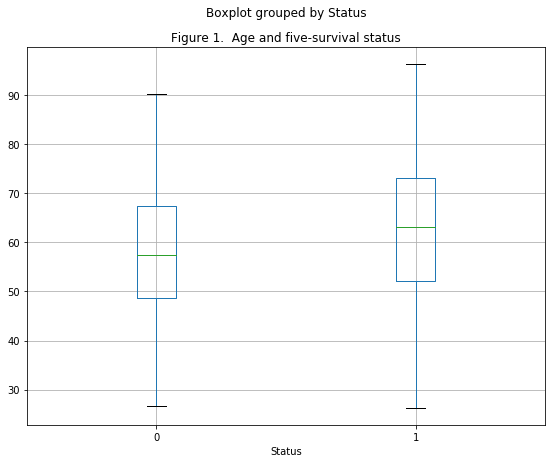

In [27]:
trdata.boxplot(column="Age at Diagnosis",by="Status",figsize=(9,7)).set_title("Figure 1.  Age and five-survival status")

As you can see from the figure 1 above, older people among breast cancer patients are more likely to die.

Text(0.5, 1.0, 'Figure 2.  The number of lymph nodes examined positive and five-survival status')

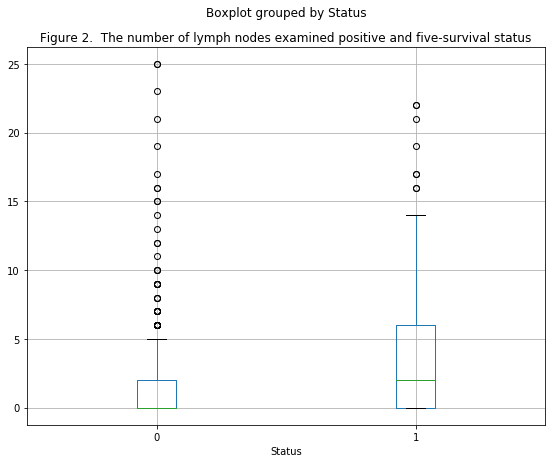

In [28]:
trdata.boxplot(column="Lymph nodes examined positive",by="Status",figsize=(9,7)).set_title("Figure 2.  The number of lymph nodes examined positive and five-survival status")

Text(0.5, 1.0, 'Figure 3.  Nottingham prognostic index and five-survival status')

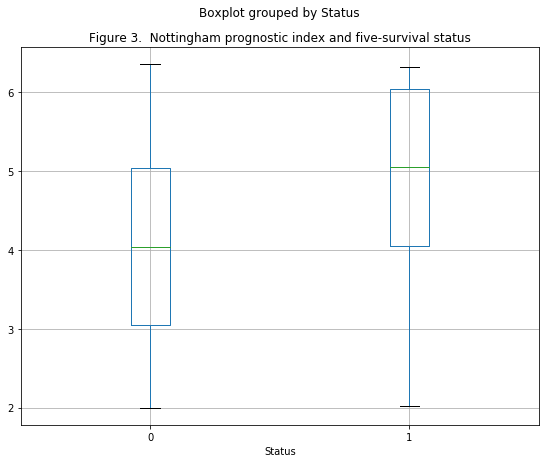

In [29]:
trdata.boxplot(column="Nottingham prognostic index",by="Status",figsize=(9,7)).set_title("Figure 3.  Nottingham prognostic index and five-survival status")

Text(0.5, 1.0, 'Figure 3.  Nottingham prognostic index and five-survival status')

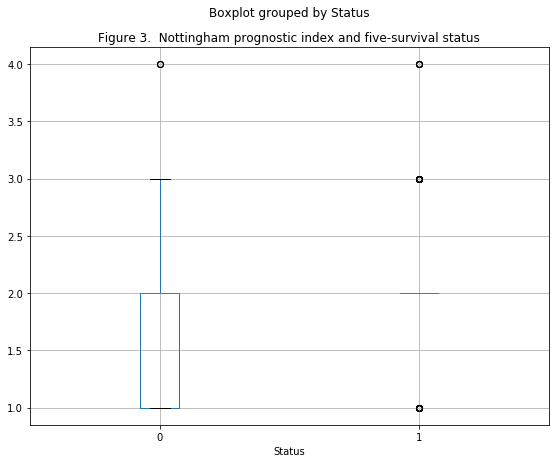

In [30]:
trdata.boxplot(column="Tumor Stage",by="Status",figsize=(9,7)).set_title("Figure 3.  Nottingham prognostic index and five-survival status")

In [31]:
trdata["Tumor Stage"].head(10)

4     2.0
5     4.0
11    2.0
12    4.0
35    2.0
37    2.0
44    3.0
47    2.0
50    2.0
51    2.0
Name: Tumor Stage, dtype: float64

As can be seen from Figure 3, there is no difference in the Nottingham prognostic index of patients in different states. This variable will be eliminated when building the model

In [32]:
r = trdata[['Cellularity',  'ER status measured by IHC',
       'HER2 status measured by SNP6', 'Inferred Menopausal State', 'Integrative Cluster', 'Age at Diagnosis',
       'Pam50 + Claudin-low subtype', '3-Gene classifier subtype',
       'Primary Tumor Laterality','Tumor Other Histologic Subtype', 'Status']].corr("spearman")

Text(0.5, 1, 'Figure 4.  Characteristic correlation')

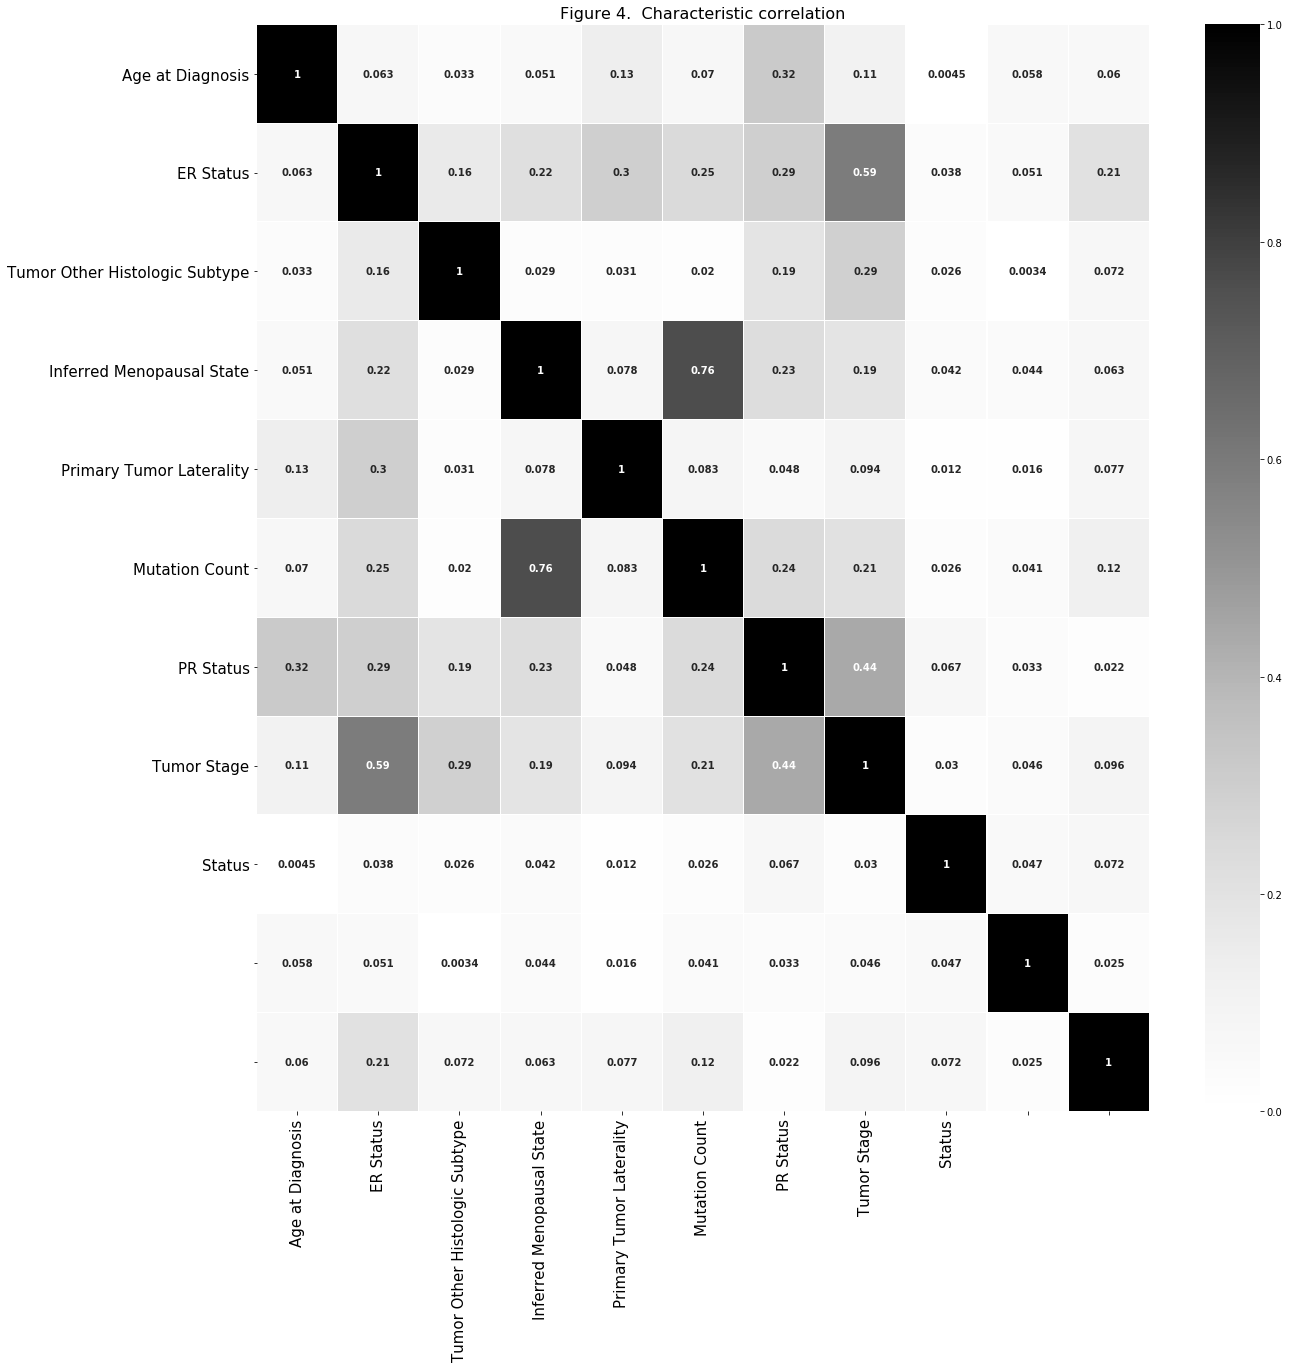

In [33]:

correction=abs(r)
# plot correlation matrix 
fig = plt.figure(figsize=(20,20)) 
names = ['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage', 'Status']
ax = fig.add_subplot()
ax = sns.heatmap(correction,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})

plt.xticks(np.arange(11)+0.5,names,fontsize=15) #
plt.yticks(np.arange(11)+0.5,names,fontsize=15) #

ax.set_title('Figure 4.  Characteristic correlation',fontsize=16)
#plt.savefig('cluster.tif',dpi=300)


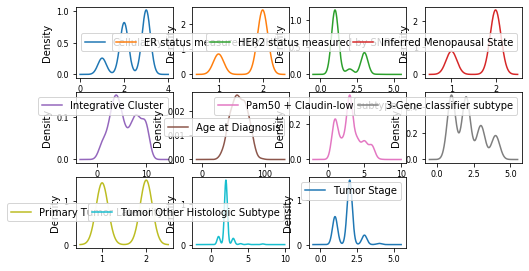

In [34]:
trdata[['Cellularity',  'ER status measured by IHC',
       'HER2 status measured by SNP6', 'Inferred Menopausal State', 'Integrative Cluster', 'Age at Diagnosis',
       'Pam50 + Claudin-low subtype', '3-Gene classifier subtype',
       'Primary Tumor Laterality','Tumor Other Histologic Subtype',"Tumor Stage"]].plot(kind='density', subplots=True, layout=(4,4), sharex=False,fontsize=8,figsize=(8,6))
plt.show()

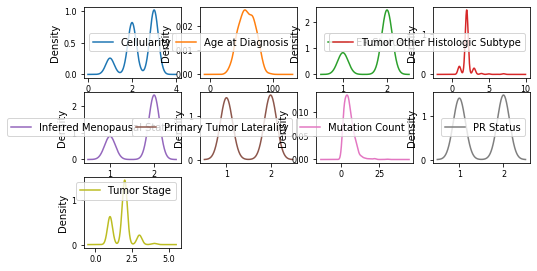

In [59]:

trdata[['Cellularity','Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage']].plot(kind='density', subplots=True, layout=(4,4), sharex=False,fontsize=8,figsize=(8,6))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


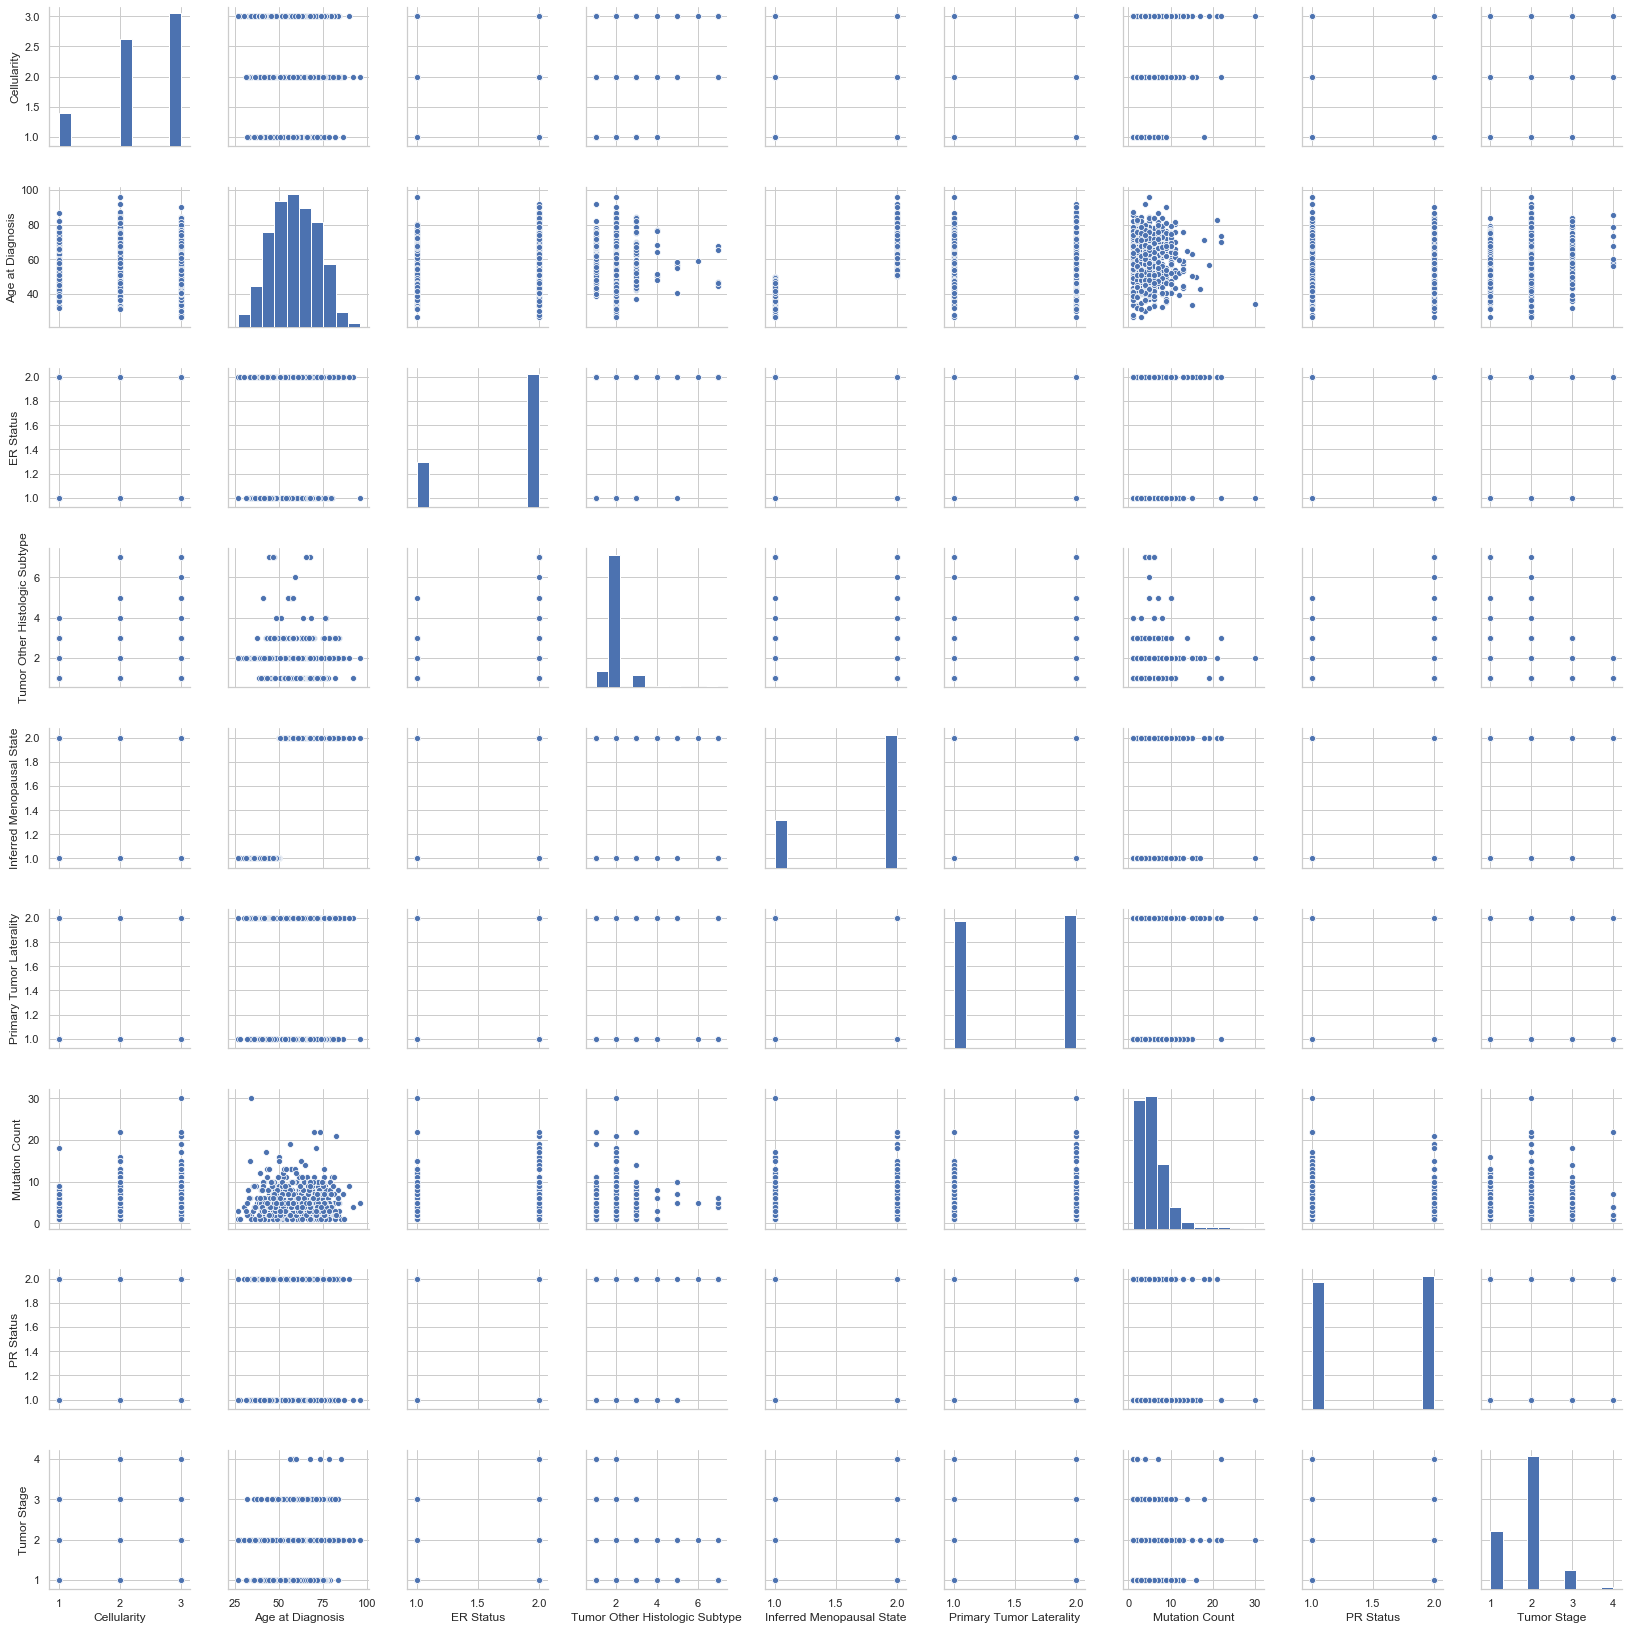

In [60]:
sns.set(style='whitegrid',context='notebook')
cols=['Cellularity','Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage']
sns.pairplot(trdata[cols],size=2.5)
plt.show()

In [ ]:
trdata[cols]

In [35]:
treatmentcor = trdata[['Chemotherapy', 'Hormone Therapy','Radio Therapy','Type of Breast Surgery', 'Status']].corr("spearman")

Text(0.5, 1, 'Figure 6.  Characteristic correlation')

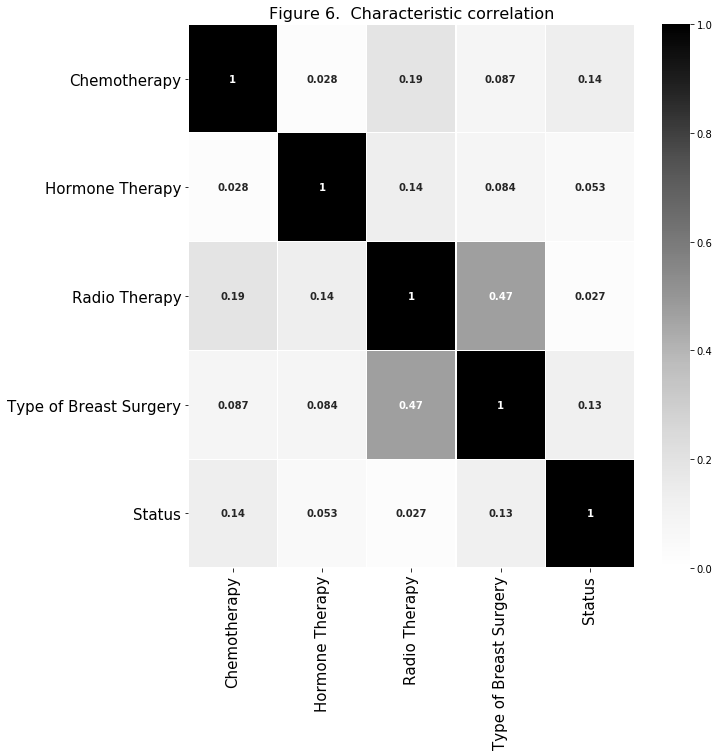

In [36]:

correction=abs(treatmentcor)
# plot correlation matrix 
fig = plt.figure(figsize=(10,10)) 
names = ['Chemotherapy', 'Hormone Therapy','Radio Therapy','Type of Breast Surgery', 'Status']
ax = fig.add_subplot()
ax = sns.heatmap(correction,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})

plt.xticks(np.arange(5)+0.5,names,fontsize=15) #
plt.yticks(np.arange(5)+0.5,names,fontsize=15) #

ax.set_title('Figure 6.  Characteristic correlation',fontsize=16)

In [37]:
print(testdf.keys())
tsdata.keys()

Index(['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'Overall Survival (Months)',
       'Overall Survival Status', 'PR Status', 'Tumor Stage', 'Status'],
      dtype='object')


Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Number of Samples Per Patient', 'Sample Type',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', 'Status'],
      dtype='object')

Figure 6 illustrates the order in which treatment methods affect the five-year survival status of breast cancer patients: 'Chemotherapy','Radio Therapy','Type of Breast Surgery', 'Hormone Therapy'.

# Machine Learning

In [38]:
var_names = ['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage']

In [39]:
trdata[var_names].shape
trdata[var_names].head(5)

testdf = testdf.dropna()
testdf.head(5)

,Age at Diagnosis,ER Status,Tumor Other Histologic Subtype,Inferred Menopausal State,Primary Tumor Laterality,Mutation Count,Overall Survival (Months),Overall Survival Status,PR Status,Tumor Stage,Status
0,37,2,2,1,2,4.0,31.5,0,2,1.0,1
1,43,1,2,1,1,1.0,218.0,0,1,2.0,0
5,49,2,2,1,2,1.0,41.8,0,2,4.0,1
6,43,2,2,1,1,4.0,260.6,0,2,1.0,0
7,43,2,2,1,1,4.0,260.6,0,2,1.0,0


In [40]:
testdf.keys()

Index(['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'Overall Survival (Months)',
       'Overall Survival Status', 'PR Status', 'Tumor Stage', 'Status'],
      dtype='object')

In [44]:
categorical = [ 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
        'PR Status', 'Tumor Stage']
trdata_s = trdata[var_names]
trdata_s["group"] = "train"
tsdata_s = tsdata[var_names]
tsdata_s["group"] = "test"
trts = pd.concat([trdata_s,tsdata_s])
#print(trts.head(5))
#trainandtest = 
mytable = tableone.TableOne(trts, categorical= categorical, 
                            groupby="group", pval=True)
mytable.to_excel("a.xlsx")
print(mytable)

<ipython-input-44-dffd212287d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_s["group"] = "train"
<ipython-input-44-dffd212287d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsdata_s["group"] = "test"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-pac

                                          Grouped by group                                               
                                                   Missing      Overall         test        train P-Value
n                                                                   820          209          611        
Age at Diagnosis, mean (SD)                              0  57.7 (12.5)  53.9 (10.7)  58.9 (12.9)  <0.001
ER Status, n (%)                      1                  0   205 (25.0)    51 (24.4)   154 (25.2)   0.890
                                      2                      615 (75.0)   158 (75.6)   457 (74.8)        
Tumor Other Histologic Subtype, n (%) 1                  0    94 (11.5)    33 (15.8)    61 (10.0)   0.001
                                      2                      634 (77.3)   148 (70.8)   486 (79.5)        
                                      3                        57 (7.0)     10 (4.8)     47 (7.7)        
                                      4       

Preprocessing

In [45]:
trvariables = np.array(trdata[var_names])
trtarget = np.array(trdata["Status"])
tsvariables = np.array(tsdata[var_names])
testvariables = np.array(testdf[var_names])

tstarget = np.array(tsdata["Status"])
testtarget = np.array(testdf["Status"])

scaler = preprocessing.StandardScaler().fit(trvariables)
scaler.transform(trvariables)
scaler.transform(tsvariables)
scaler.transform(testvariables)

array([[-1.70453655,  0.58050005, -0.09416906, ..., -0.325616  ,
         0.97574417, -1.35934544],
       [-1.23840694, -1.72265274, -0.09416906, ..., -1.20853633,
        -1.02485881,  0.25339255],
       [-0.77227733,  0.58050005, -0.09416906, ..., -1.20853633,
         0.97574417,  3.47886853],
       ...,
       [-0.92765387,  0.58050005, -1.49751767, ..., -1.20853633,
         0.97574417,  0.25339255],
       [-0.22845945,  0.58050005, -0.09416906, ..., -0.325616  ,
         0.97574417,  0.25339255],
       [ 0.08229362,  0.58050005, -0.09416906, ...,  2.9117585 ,
         0.97574417,  0.25339255]])

Feature selection

In [46]:
# select feature by chi-square test based on linear regression
newvar = SelectKBest(chi2,k=5).fit(trvariables,trtarget).get_support(indices=True)
print(newvar)

[0 1 5 6 7]


In [47]:
newvarnames = np.array(var_names)[newvar]
print(newvarnames)

trvariables = np.array(trdata[newvarnames])
trtarget = np.array(trdata["Status"])
tsvariables = np.array(tsdata[newvarnames])
tstarget = np.array(tsdata["Status"])

# msk
testvariables = np.array(testdf[newvarnames])
testtarget = np.array(testdf["Status"])

['Age at Diagnosis' 'ER Status' 'Mutation Count' 'PR Status' 'Tumor Stage']


From the above 10 variables, we can find the variables 'Integrative Cluster'  we wish to study.

LogisticRegression 

In [48]:
lr = LogisticRegression(penalty='l1',solver='liblinear') # L1 regularization to prevent overfitting
lr.fit(trvariables,trtarget) 
# metabric
y_prob = lr.predict_proba(tsvariables)[:,1]                           # predict probability
y_pred = lr.predict(tsvariables)    # predict
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(tstarget,y_prob)    # fpr_lr,tpr_lr
auc_lr = metrics.auc(fpr_lr,tpr_lr)                              # AUC
accuracy = metrics.accuracy_score(tstarget,y_pred)                 # accuracy
print([accuracy,auc_lr])

# MSK 
y_prob = lr.predict_proba(testvariables)[:,1]                           # predict probability
y_pred = lr.predict(testvariables)    # predict
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(testtarget,y_prob)    # fpr_lr,tpr_lr
auc_lr = metrics.auc(fpr_lr,tpr_lr)                              # AUC
accuracy = metrics.accuracy_score(testtarget,y_pred)                 # accuracy
print([accuracy,auc_lr])

[0.7942583732057417, 0.7378787878787878]
[0.4941500344115623, 0.5793481796093287]


SVM 

In [49]:
svc = SVC(kernel='linear').fit(trvariables,trtarget) # kernel: "linear","rbf","sigmoid"

y_prob = svc.decision_function(tsvariables)                              
y_pred = svc.predict(tsvariables)                                        
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(tstarget,y_prob)     
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              
accuracy = metrics.accuracy_score(tstarget,y_pred)
print([accuracy,auc_svc])

# MSK 
y_prob = svc.decision_function(testvariables)                          # predict probability
y_pred = svc.predict(testvariables)    # predict
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(testtarget,y_prob)    # fpr_lr,tpr_lr
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              # AUC
accuracy = metrics.accuracy_score(testtarget,y_pred)                 # accuracy
print([accuracy,auc_svc])

[0.7894736842105263, 0.7483471074380166]
[0.4507914659325533, 0.5549130459737128]


RandomForest

In [50]:
forest = RandomForestClassifier(n_estimators=86,min_samples_split=8, max_depth= 23,oob_score=True)

forest.fit(trvariables,trtarget)

y_prob = forest.predict_proba(tsvariables)                              
y_pred = forest.predict(tsvariables)            

predictions_validation = y_prob[:, 1]
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(tstarget,predictions_validation)     
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              
accuracy = metrics.accuracy_score(tstarget,y_pred)
print([accuracy,auc_svc])

# MSK 
y_prob = forest.predict_proba(testvariables)                          # predict probability
y_pred = forest.predict(testvariables)    # predict

predictions_validation = y_prob[:, 1]
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(testtarget,predictions_validation) 
#fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(testtarget,y_prob)    # fpr_lr,tpr_lr
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              # AUC
accuracy = metrics.accuracy_score(testtarget,y_pred)                 # accuracy
print([accuracy,auc_svc])

[0.7942583732057417, 0.7550964187327824]
[0.5313145216792843, 0.5643641546614628]


Cox regression

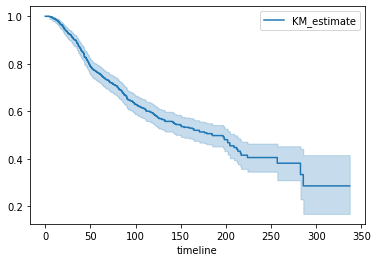

In [51]:
# KaplanMeier survival curve: train data
kmf = KaplanMeierFitter()
T = np.array(trdata["Overall Survival (Months)"])
E = np.array(trdata["Overall Survival Status"])
kmf.fit(T, event_observed=E)
kmf.plot()

The above graph shows the cumulative survival rate of breast cancer patients

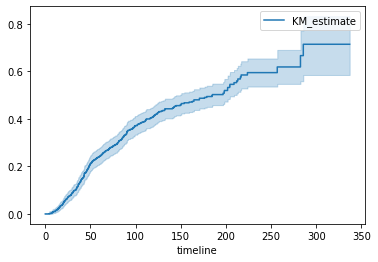

In [52]:
# plot the cumulative density function
kmf.plot_cumulative_density()

The above graph shows the cumulative mortality of breast cancer patients

In [53]:
# Using Cox Proportional Hazards model
cphnames = ['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage',  'Overall Survival (Months)',
       'Overall Survival Status']
regression_dataset = trdata[cphnames]
regression_dataset.columns = ['Age at Diagnosis', 'ER Status', 'Tumor Other Histologic Subtype',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage',  'T','E']

cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()
#cph.plot()

Select variables based on P value(0.05):Age at Diagnosis, Tumor Stage,PR Status,Mutation Count,Primary Tumor Laterality

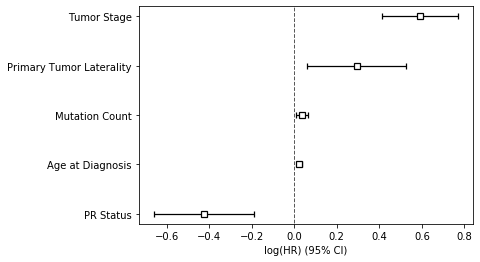

In [54]:
# Using Cox Proportional Hazards model
cphnames = ['Age at Diagnosis','Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage',  'Overall Survival (Months)',
       'Overall Survival Status']
regression_dataset = trdata[cphnames]
regression_dataset.columns = ['Age at Diagnosis', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage',  'T','E']

cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()
cph.plot()

From the above chart and table, we can explain the coefficients of the model: exp(coef) represents the relative value of the increase in risk ratio when the corresponding variable increases by one unit. Therefore, it can be considered that Tumor Stage and Primary Tumor Laterality have the greatest impact on the survival of breast cancer patients. PR Status and survival time are negatively correlated and have a greater impact on the outcome. Age at Diagnosis and Mutation Count are secondary factors that affect the survival of breast cancer patients. The concordance_index value on train data is 0.67.

Cox regression performance

METABRIC TEST:concordance_index

In [55]:
cphnames = ['Age at Diagnosis', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage']
ts_dataset = tsdata[cphnames]

#cph.predict_survival_function(ts_dataset)
#cph.predict_median(ts_dataset)
concordance_index(tsdata['Overall Survival (Months)'], -cph.predict_partial_hazard(ts_dataset), tsdata['Overall Survival Status'])

0.6062433216302855

MSK TEST:concordance_index

In [56]:
cphnames = ['Age at Diagnosis', 'Primary Tumor Laterality',
       'Mutation Count', 'PR Status', 'Tumor Stage']
test_dataset = testdf[cphnames]

#cph.predict_survival_function(ts_dataset)
#cph.predict_median(ts_dataset)
concordance_index(testdf['Overall Survival (Months)'], -cph.predict_partial_hazard(test_dataset), testdf['Overall Survival Status'])

0.5846252078878593

|   | METABRIC train | METABRIC test | MSK test |
|----| ---- |----|----|
|concordance index | 0.67 | 0.606 | 0.584|

From the performance of the two test sets in the above table, the performance of the two is not much different. Therefore, it can be summarized that using the selected five variables to predict the performance concordance index of the complete data of breast cancer patients is 0.6.

# Conclusion

By comparing the performance of the two sets of methods, we can know that logistic regression model and SVM have the same effect. At the same time, the accuracy of the classification model in predicting the five-year survival status of breast cancer patients reached 78.9%.There are five variables selected for modeling: 'Age at Diagnosis' 'ER Status' 'Mutation Count' 'PR Status' 'Tumor Stage'.However, the prediction effect on MSK is average, and there may be some differences in the data.